In [97]:
import pandas as pd
import sklearn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

### Data ingestion for ML

In [127]:
df = pd.read_csv('data.csv', index_col=0)
df = df[['Reactions', 'Composure', 'Vision', 'ShortPassing', 'BallControl', 'Overall', 'Name']]
df = df.dropna()

df = shuffle(df, random_state=10)
print(df.head())

       Reactions  Composure  Vision  ShortPassing  BallControl  Overall  \
16133       46.0       48.0    42.0          55.0         64.0       58   
6285        66.0       66.0    63.0          61.0         66.0       69   
15884       55.0       51.0    47.0          53.0         55.0       58   
9156        56.0       55.0    37.0          59.0         49.0       66   
495         77.0       61.0    57.0          37.0         34.0       80   

              Name  
16133     A. Bakir  
6285   João Victor  
15884     B. Singh  
9156      G. Milan  
495        J. Zoet  


### Correlation Map

In [ ]:
plt.figure(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
print(corr['Overall'].sort_values())

### Train Test split

In [99]:
def split_df(df):
    X = df.drop(['Overall', 'Name'], axis=1).values
    name = df['Name'].values
    y = df['Overall'].values
    split = int(len(X) * 0.7)
    X_train = X[:split]
    X_test = X[split:]
    y_train = y[:split]
    y_test = y[split:]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_df(df)

print(X_train)
print(y_train)

[[66. 68. 64. 67. 70.]
 [59. 60. 38. 63. 63.]
 [73. 65. 76. 74. 75.]
 ...
 [61. 56. 64. 66. 70.]
 [68. 67. 78. 74. 75.]
 [38. 57. 56. 63. 65.]]
[69 64 75 ... 66 73 62]


### Fit a Linear Regression Model

In [100]:
reg = LinearRegression().fit(X_train, y_train)

In [101]:
print(reg.score(X_train, y_train))
print(reg.coef_)

0.7647223974005128
[ 0.50950563  0.1768051  -0.00151239  0.03146114 -0.03729289]


In [115]:
#Reactions  Composure  Vision  ShortPassing  BallControl 
new_player = [95, 96, 94, 90, 96]

print(reg.predict([new_player]))

[89.28025053]


In [ ]:
new_player = [66, 68, 64, 67, 70]

def calc_overall(new_player, model):
    return model.predict(new_player)

print(calc_overall(new_player, reg))

### Kmeans

In [3]:
df = pd.read_csv('data.csv', index_col=0)
df = shuffle(df, random_state=10)
df = df.head(10)
df = df[['Name', 'Age', 'Overall', 'Finishing', 'Dribbling', 'Stamina', 'LongShots', 'Interceptions','Vision', \
        'StandingTackle', 'GKDiving']]

df = df[['Name', 'Age', 'Overall']]

X = df.drop('Name', axis=1)
y = df['Name']

print(X)
print()
print(y)

       Age  Overall
2192    28       74
11705   26       64
3207    31       73
952     29       77
15053   22       60
7337    24       68
14875   21       60
1773    28       75
4656    24       71
17347   19       54

2192          R. Ortiz
11705         D. López
3207        C. Carmona
952         A. Carroll
15053    H. Tijanovich
7337       S. Väisänen
14875        Hu Ruibao
1773       A. Westwood
4656       M. Jevtovic
17347          M. Napa
Name: Name, dtype: object


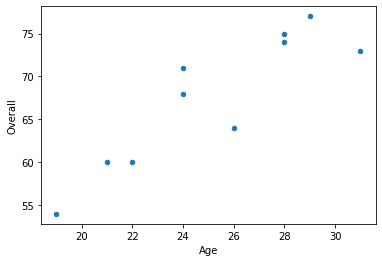

In [4]:
ax = X.plot.scatter(x='Age', y='Overall')
plt.show()

In [18]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [19]:
new_player = [25, 70]
neigh.predict([new_player])

array(['M. Jevtovic'], dtype=object)